In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seb_data.data_array as data_array
import seb_data.disfa as disfa

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# use the first subject as example. all availabe subjects are stored in disfa.disfa_id_subj_all
id_sub = 1
# load all AU targets from subject 1
targets = disfa.disfa['AUall'][id_sub][:]

[FileHDF5] read file \\fs-vol-hmi.doc.ic.ac.uk\hmi\projects\sebastian\DISFA\Labels\AUall\SN001_labels_AUall.mat


In [11]:
# targets contain 4845 frames and 12 AUs
# see http://www.engr.du.edu/mmahoor/DISFAContent.htm for the description of the AUs, the order is ascending
targets.shape

(4845, 12)

In [24]:
# load all images from subject 1
images = disfa.disfa['images'][id_sub][:]

[FileHDF5] read file \\fs-vol-hmi.doc.ic.ac.uk\hmi\projects\sebastian\DISFA\Features\images\SN001_features_images.mat


In [25]:
# images contain 4845 frames with images of size 128 x 118 (x and y axis are swapped)
images.shape

(4845, 118, 128)

annotated AUs are [ 0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.]


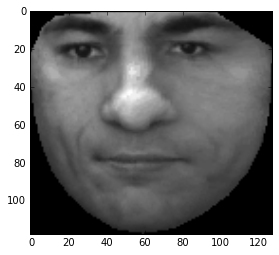

In [31]:
# print the AU annotations and plot the image of the first sample
print('annotated AUs are {}'.format(targets[0,:]))
plt.imshow(images[0,:,:], cmap='gray')

In [35]:
# as convenience function to load data from all subjects, use:
targets_all, id_array = data_array.IndicesCollection(disfa.disfa_ic_all).getitem(disfa.disfa['AUall'])

[FileHDF5] read file \\fs-vol-hmi.doc.ic.ac.uk\hmi\projects\sebastian\DISFA\Labels\AUall\SN001_labels_AUall.mat
[FileHDF5] read file \\fs-vol-hmi.doc.ic.ac.uk\hmi\projects\sebastian\DISFA\Labels\AUall\SN002_labels_AUall.mat
[FileHDF5] read file \\fs-vol-hmi.doc.ic.ac.uk\hmi\projects\sebastian\DISFA\Labels\AUall\SN003_labels_AUall.mat
[FileHDF5] read file \\fs-vol-hmi.doc.ic.ac.uk\hmi\projects\sebastian\DISFA\Labels\AUall\SN004_labels_AUall.mat
[FileHDF5] read file \\fs-vol-hmi.doc.ic.ac.uk\hmi\projects\sebastian\DISFA\Labels\AUall\SN005_labels_AUall.mat
[FileHDF5] read file \\fs-vol-hmi.doc.ic.ac.uk\hmi\projects\sebastian\DISFA\Labels\AUall\SN006_labels_AUall.mat
[FileHDF5] read file \\fs-vol-hmi.doc.ic.ac.uk\hmi\projects\sebastian\DISFA\Labels\AUall\SN007_labels_AUall.mat
[FileHDF5] read file \\fs-vol-hmi.doc.ic.ac.uk\hmi\projects\sebastian\DISFA\Labels\AUall\SN008_labels_AUall.mat
[FileHDF5] read file \\fs-vol-hmi.doc.ic.ac.uk\hmi\projects\sebastian\DISFA\Labels\AUall\SN009_labels_AU

In [38]:
# id_array contains the subjects and frame number of each sample:
id_array[0,:]
#this means the first sample is from subject 1 frame 0

array([1, 0])